

Prof: Eric Van Dusen  


# "Who Becomes An Inventor In America" -- Income and Innovation



## Abstract 
Our paper summarizes Raj Chetty's study on the link between socioeconomic factors and innovation in the US. The original study found that children from high-income families are more likely to become inventors. Two insight questions were raised and answered using regression models. The first question examined the relationship between intergenerational wealth and the persistence of innovation. The utilizing linear and ridge lasso regression models indicated that Baby Boomers received more rewards than recent inventors, and decision-makers should establish policies to ensure inventor remuneration rights. The second question investigated whether the income effect varies across colleges. We found that the effect of income on the number of inventors is not significant for community colleges, but there is a positive effect for non-community colleges. Our models coupled with Chetty’s work show how there are many factors impacting the number of inventors and the inventor lifecycle.

## Project Background 
Widely regarded as a key economic growth factor, innovation can be found in any age group. Raj Chetty’s paper “Who becomes an inventor in America? The importance of exposure to innovation” explores which individuals and their circumstances lead to them becoming an inventor. In other studies of innovation, there is a lack in the connection between innovation and environmental factors, but Chetty creates a more complete ‘portrait of inventors’ in the US today by looking at patent records and individual patent characteristics to study the link between socioeconomic factors and innovation. Chetty argues that a large portion of the propensity to innovate comes from environmental factors, and this paper studies the relationship between innovative ability and three distinct factors: economic class, race, and gender.

The paper provides important insights into the role of environmental factors in shaping innovation, and highlights the need to increase access to innovation for all individuals, regardless of socioeconomic background. In our regressions using the provided datasets in Raj Chetty’s research, we take Innovation Rates by College and Income Distributions of Inventors by Year and Age to delve into the relationship between innovation and socioeconomic class.

For our first insight question: Section 3 in the article titled Gaps in Innovation by Characteristics at Birth states that a predictive factor, for the propensity to innovate, such as income will show that children from high-income families are ten times as likely to become inventors as those from below-median income families. Parental income, the characteristic in question, does play a role, thus saying that a difference in environment, the nurture factor, can increase or decrease one’s ability to innovate. This circumstance then bears the question of intergenerational wealth, where we identify that innovation continues to trend upwards throughout generations and whether or not this is due to intergenerational wealth. In our regression models for insight question #1, we seek to reproduce the analysis between average income and the generations provided in the study’s data-frame’s, 4a, in order to see whether or not wealth is also transmitting upwards because a greater average income in succeeding generations, will show that this environmental factor is a relevant variable in the intergenerational persistence of innovation.

For our second insight question: inspired by the finding in paper “gaps in innovation by parental income are relatively small among children who attend the same college” (Chetty et al 17), we are interested in studying the income effect as our variable of interest and the number of inventors as a covariate to predict the number of patents, and finding out if the income effect varies across colleges (community colleges vs. regular colleges).

## Project Objective (5 points)
The purpose of this project is to measure the impact of socioeconomic class as a predictor of the propensity to innovate, specifically the differences in generational income and type of college attended.


## Data Description (5 points)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
#research question 1:
generation = pd.read_csv('table_4a.csv')
generation

,year,age,cohort,count,total_inc_p10,total_inc_p20,total_inc_p30,total_inc_p40,total_inc_p50,total_inc_p60,...,nw_inc_p20,nw_inc_p30,nw_inc_p40,nw_inc_p50,nw_inc_p60,nw_inc_p70,nw_inc_p80,nw_inc_p90,nw_inc_p99,nw_inc_mean
0,1999.0,25,1974.0,25677,0,2600,16000,25100,36500,48200,...,-200,0,0,0,0,400,2000,8900,74500,5200
1,1999.0,26,1973.0,26323,0,6500,20600,30200,43400,55000,...,-300,0,0,0,100,800,2800,11500,97600,10900
2,1999.0,27,1972.0,28221,0,9800,23600,37000,49900,60500,...,-300,0,0,0,200,1100,3800,15000,118500,11500
3,1999.0,28,1971.0,30511,0,15200,29300,44200,56000,66900,...,-300,0,0,100,500,1700,5200,18100,163900,18900
4,1999.0,29,1970.0,32907,0,19200,34900,49500,61500,72600,...,-200,0,0,200,800,2300,6600,22100,198900,19200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,NaN,66,NaN,129582,8600,28700,49200,67800,88500,113200,...,0,2500,11900,24300,38800,57700,86600,160700,2001400,145600
680,NaN,67,NaN,115618,8400,28100,47900,65400,85500,110300,...,0,3100,13500,26300,40600,59500,88900,163400,2082600,150200
681,NaN,68,NaN,104704,7400,26700,46200,62800,82200,105700,...,0,3700,15000,27900,42500,61600,90700,167000,2109000,160100
682,NaN,69,NaN,94317,6000,25300,44800,60500,78800,101900,...,0,4500,16500,29500,44100,63400,93700,170800,2042800,149500


Question 1/ Table 4a:

For both our insight questions, our data comes from Chetty’s paper Who Becomes an Inventor in America? The Importance of Exposure to Innovation”, and question 1 uses table 4a, Income Distributions of Inventors by Year and Age (https://opportunityinsights.org/wp-content/uploads/2018/04/Inventors-Codebook-Table-4.pdf). This table tells us the year, age, cohort (which is their year of birth), count(number of inventors in that year) and age group, and different percentiles of their income as W-2, total, and non-wage. As for the scope and temporality, the data covers ages of inventors 25-70 over the years 1999-2012. The data is missing values of year and cohort because the study specifies 2012, age 70, as the boundary of the scope of the data. We assume the data missing those values is from 2013, so we choose to drop those values. Our target variables for this question are total_inc_mean (explained variable), and cohort (dummy variables: generation) and count (explanatory variables).

Question 2/Table3:

The structure of the dataset that we used for the second question is a table when the rows are the records, and columns are attributes. The column attributes are quantitative variables. Granularity is a college. The data includes children who were born in 1980-1984 cohorts who attend college between the ages of 19-22. The students that are restricted to U.S. citizens as of 2013 and non-immigrants. Since most people attend colleges around 19-22, we agree that the dataset has covered our area of interest. There is no missing data in Table 3. For the first model, we use “count”, “inventor_pq5”, “total_patents”, “total_citations” as our explanatory variables, “count”, the number of inventors as our predicted value. In the second model, we use “count”, “cohort” as explanatory variables, the share of inventors in each college as our predicted variable. 


## Data Cleaning (5 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.   

Question 1
After importing both Table 3 and Table 4a from the original paper, we cleaned up the data but checked through for any missing NaN values. Within the provided Table 4a that we would use for our first question, we had approximately 50 data points that contained NaN values that we decided to drop. Even though this could have caused a little bias in the dataset that we will now be using, determining the necessary values for those data points would not have been accurate and could have skewed final results. Given how we are comparing the total mean income between each year, age, and generation, we had checked the data for any outliers that would have vastly made a difference in our results. We discovered one outlier data point with a negative total mean income. And while the negative total mean income could have been due to a vast debt accumulated from one person in that data point that skewed the data, we decided to exclude it given how vastly different the outlier was and how much it could potentially skew final results. 

Two major additional cleaning and merging of the data for Table 4a would be creating a new column in the table that would categorize the data points by the generation people would fall under depending on their cohort. We had four categories (Gen Z, Millennial, Gen X, and Baby Boomerwith about only three of them actually appearing in the refined data set. The second major data cleaning applied to this data set before we began further manipulating it for data analysis was to determine the most reasonable income column to use. Within Table 4a, the total income of a certain age group from a certain year could be broken down into the different percentiles of income, the mean income of the whole age group, and then additional W2 income percentiles and statistics. Given how all income presented in the table was standardized to 2012 US dollars, we decided to choose total mean income as we are observing the population of inventors as a whole over the years and in comparison to each generation. 

Question 2
For the provided Table 3 used in our second question, we checked for any NaN values in the dataset and discovered there were none. The data set consisted of the counts of students within each school and then the ratio of inventors in that school with parents in a certain quintile income bracket. Since our second question is to explore the number of patents given student inventors’ parents income, we manipulated the data to multiply the count with the ratio of student inventors with parents in the top quintile income bracket to obtain a new column in the table encompassing the number of student inventors in the given school with parents in the top quintile income bracket. Additionally, we classified the colleges under community colleges and non community colleges to further explore if community colleges or non community colleges have more inventors. We also created total patent ratios and total cites ratios based on the total number of students in each college (count) and compared it to the total patents and cites from the same college.


Research question 1:

In [ ]:
generation.isna().any()
generation = generation.dropna()
generation.shape

(638, 37)

In [ ]:
generation_relevant = generation[['year','age','cohort','count','total_inc_mean',"total_inc_p90"]]
generation_relevant.tail()

,year,age,cohort,count,total_inc_mean,total_inc_p90
633,2012.0,66,1946.0,17205,261600,304900
634,2012.0,67,1945.0,13959,219400,297700
635,2012.0,68,1944.0,13127,334700,302800
636,2012.0,69,1943.0,13592,197800,302500
637,2012.0,70,1942.0,12562,231300,305500


In [ ]:
#create bins of different generation ranges
gen_z_range = range(1995,2011)
millennial_range = range(1980,1996)
gen_x_range = range(1965,1977)
baby_boomber_range = range(1946,1965)

In [ ]:
def standardization(df, column):
  mean = np.mean(df[column])
  sd = np.std(df[column])
  df[column] = (df[column] - mean)/sd
  return df[column]

In [ ]:
#label the ages to their respective generation and create a new column for them
def get_generation(cohort):
    if cohort in gen_z_range:
        return 'Gen Z'
    elif cohort in millennial_range:
        return 'Millennial'
    elif cohort in gen_x_range:
        return 'Gen X'
    else:
        return 'Baby Boomer'
    
generation_relevant['generation'] = generation_relevant['cohort'].apply(get_generation)
generation_relevant = generation_relevant[generation_relevant['total_inc_mean'] >= 0]
#removing the outlier with a negative total income mean

<ipython-input-69-059fb7fcb4fc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generation_relevant['generation'] = generation_relevant['cohort'].apply(get_generation)


In [ ]:
gen_dummies = pd.get_dummies(generation_relevant['generation'])
count_gen = pd.concat([generation_relevant,gen_dummies],axis = 1)
#count_gen = count_gen.drop('Millennial', axis = 1)
count_gen

,year,age,cohort,count,total_inc_mean,total_inc_p90,generation,Baby Boomer,Gen X,Millennial
0,1999.0,25,1974.0,25677,46100,86400,Gen X,0,1,0
1,1999.0,26,1973.0,26323,57200,96900,Gen X,0,1,0
2,1999.0,27,1972.0,28221,64800,108000,Gen X,0,1,0
3,1999.0,28,1971.0,30511,79600,120200,Gen X,0,1,0
4,1999.0,29,1970.0,32907,88600,132100,Gen X,0,1,0
...,...,...,...,...,...,...,...,...,...,...
633,2012.0,66,1946.0,17205,261600,304900,Baby Boomer,1,0,0
634,2012.0,67,1945.0,13959,219400,297700,Baby Boomer,1,0,0
635,2012.0,68,1944.0,13127,334700,302800,Baby Boomer,1,0,0
636,2012.0,69,1943.0,13592,197800,302500,Baby Boomer,1,0,0




```
```

##Inference Question #2: 
In this question we are using Raj Chetty's data in Table 3 and diving into the how different schools and school systems impact the total number patents.

Going into this question we wanted to understand if there is a significant difference between the number of patents coming from the two schooling systems: Community College and Non COmmunity College. Further understanding what factors influence the total number of patetns that are produced by each schooling system. Are they the same or different factors? Why?

In [ ]:
college = pd.read_csv('table_3.csv')
college.head(5)

,super_opeid,instnm,count,count_pq1,count_pq2,count_pq3,count_pq4,count_pq5,inventor,inventor_pq1,inventor_pq2,inventor_pq3,inventor_pq4,inventor_pq5,top5cit,total_patents,total_cites
0,1,University Of Hawaii And Hawaii Community Coll...,27002,3205,4527,5628,6957,6685,0.001037,0.000312,0.000663,0.000533,0.000719,0.002393,0.000069,22,55
1,4,Coast Community College District,24340,4183,3829,4311,5066,6951,0.001643,0.001195,0.001045,0.001160,0.001382,0.002733,0.000120,76,333
2,13,Kern & North Orange County Community College D...,18765,2521,3091,3564,4410,5179,0.001119,0.001190,0.000000,0.001403,0.000907,0.001738,0.000005,28,22
3,16,San Mateo County Community College District,10936,1253,1658,2187,2513,3325,0.001646,0.002394,0.003619,0.000457,0.001194,0.001504,0.000106,35,2474
4,19,Foothill-Deanza Community College District,16619,2245,2287,2798,3206,6083,0.003189,0.003118,0.000437,0.003574,0.001871,0.004767,0.000183,137,1497


In [ ]:
college.shape

(423, 17)

In [ ]:
college.isna().any()

super_opeid      False
instnm           False
count            False
count_pq1        False
count_pq2        False
count_pq3        False
count_pq4        False
count_pq5        False
inventor         False
inventor_pq1     False
inventor_pq2     False
inventor_pq3     False
inventor_pq4     False
inventor_pq5     False
top5cit          False
total_patents    False
total_cites      False
dtype: bool

In [ ]:
# define our bins for low, medium, high percentiles of shares of investors
low_bound = np.percentile(college['inventor'],25)
medium_bound = np.percentile(college['inventor'],75)
low_bound, medium_bound

(0.0019117000000000001, 0.007867550000000001)

In [ ]:
def share_bin(row):
  if row <= 0.0019:
    return "low"
  elif row > 0.0019 and row <= 0.0079:
    return "medium"
  else:
    return "high"

college['bins'] = college['inventor'].apply(share_bin)
college.head(5)

,super_opeid,instnm,count,count_pq1,count_pq2,count_pq3,count_pq4,count_pq5,inventor,inventor_pq1,inventor_pq2,inventor_pq3,inventor_pq4,inventor_pq5,top5cit,total_patents,total_cites,bins
0,1,University Of Hawaii And Hawaii Community Coll...,27002,3205,4527,5628,6957,6685,0.001037,0.000312,0.000663,0.000533,0.000719,0.002393,0.000069,22,55,low
1,4,Coast Community College District,24340,4183,3829,4311,5066,6951,0.001643,0.001195,0.001045,0.001160,0.001382,0.002733,0.000120,76,333,low
2,13,Kern & North Orange County Community College D...,18765,2521,3091,3564,4410,5179,0.001119,0.001190,0.000000,0.001403,0.000907,0.001738,0.000005,28,22,low
3,16,San Mateo County Community College District,10936,1253,1658,2187,2513,3325,0.001646,0.002394,0.003619,0.000457,0.001194,0.001504,0.000106,35,2474,low
4,19,Foothill-Deanza Community College District,16619,2245,2287,2798,3206,6083,0.003189,0.003118,0.000437,0.003574,0.001871,0.004767,0.000183,137,1497,medium


In [ ]:
def get_ratio(data, total, column):
  data[column+' ratio'] = data[column]/data[total]
  return data 
college = get_ratio(college, 'count','total_patents')
college = get_ratio(college, 'count','total_cites')
college.head(5)

college['bins'] = college['inventor'].apply(share_bin)

In [ ]:
#Makes a boolean variable 
#we make two variables where on is true for is a community college and the other is not a community college
cc = college["instnm"].str.contains("Community College")
college["cc"] = cc
cc = college[college["cc"] == True]
not_cc = college[college["cc"] == False]

#just making sure everything has been done alright and none of the data as been lost
cc.shape, not_cc.shape

((43, 21), (380, 21))

Here I am creating a num_pq5 variable which will allow us to better understand how many inventors there are per school and then be able to compare not only each school, but also the differetn school systems that we are comparing in this question as well

In [ ]:
#Creating num_pq5 variable
cc["num_pq5"] = cc["count"] * cc["inventor_pq5"]
not_cc["num_pq5"] = not_cc["count"] * not_cc["inventor_pq5"]
cc.head(5)

<ipython-input-78-63ad96017d30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc["num_pq5"] = cc["count"] * cc["inventor_pq5"]
<ipython-input-78-63ad96017d30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_cc["num_pq5"] = not_cc["count"] * not_cc["inventor_pq5"]


,super_opeid,instnm,count,count_pq1,count_pq2,count_pq3,count_pq4,count_pq5,inventor,inventor_pq1,...,inventor_pq4,inventor_pq5,top5cit,total_patents,total_cites,bins,total_patents ratio,total_cites ratio,cc,num_pq5
0,1,University Of Hawaii And Hawaii Community Coll...,27002,3205,4527,5628,6957,6685,0.001037,0.000312,...,0.000719,0.002393,0.000069,22,55,low,0.000815,0.002037,True,64.626587
1,4,Coast Community College District,24340,4183,3829,4311,5066,6951,0.001643,0.001195,...,0.001382,0.002733,0.000120,76,333,low,0.003122,0.013681,True,66.530956
2,13,Kern & North Orange County Community College D...,18765,2521,3091,3564,4410,5179,0.001119,0.001190,...,0.000907,0.001738,0.000005,28,22,low,0.001492,0.001172,True,32.609817
3,16,San Mateo County Community College District,10936,1253,1658,2187,2513,3325,0.001646,0.002394,...,0.001194,0.001504,0.000106,35,2474,low,0.003200,0.226225,True,16.445557
4,19,Foothill-Deanza Community College District,16619,2245,2287,2798,3206,6083,0.003189,0.003118,...,0.001871,0.004767,0.000183,137,1497,medium,0.008244,0.090078,True,79.229421


## Exploratory Data Analysis (20 points)


Question 1: It can be observed from the scatterplot that there is a positive correlation between age and total income mean. There is a higher variance in the average of total income when age increases. We guess the variance can be arose from generation difference. It should be noted that the majority of the graph is dominated by GenX for the lower age groups and Baby Boomers for the higher age groups. This could be due to the years the data points were obtained and the length of time each inventor has been in the field.

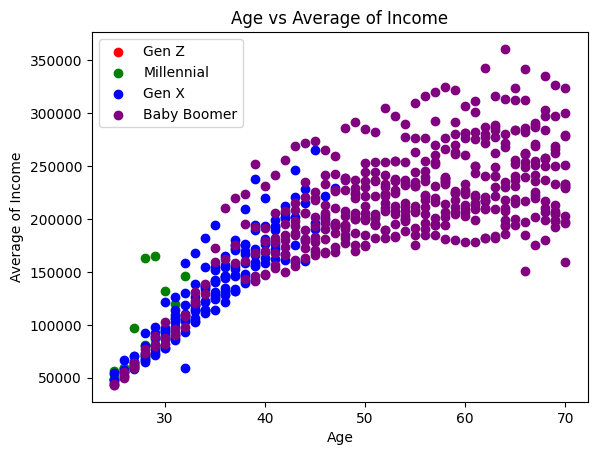

In [ ]:
fig, ax = plt.subplots()
colors = {'Gen Z': 'red', 'Millennial': 'green','Gen X': 'blue','Baby Boomer': 'purple'}
for generation, color in colors.items():
    x = generation_relevant.loc[generation_relevant['generation'] == generation, 'age']
    y = generation_relevant.loc[generation_relevant['generation'] == generation, 'total_inc_mean']
    ax.scatter(x, y, color = color, label = generation)

ax.set_xlabel('Age')
ax.set_ylabel('Average of Income')
plt.title('Age vs Average of Income')
ax.legend()
plt.show()

We can see a very high correlation between the total income of the 90th percentile and the average of total income. Even though there is a high correlation between them, we still need to be cautious about the reverse causality. We can observe one outlier in the total average income of inventors.

Text(0.5, 1.0, 'total income the 90th percentile vs average of inventors income')

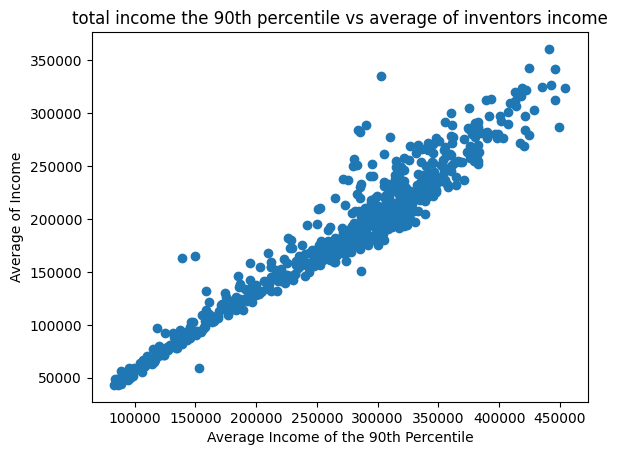

In [ ]:
plt.scatter(x=count_gen['total_inc_p90'],y=count_gen['total_inc_mean'])
plt.xlabel('Average Income of the 90th Percentile')
plt.ylabel('Average of Income')
plt.title('total income the 90th percentile vs average of inventors income')

Text(0.5, 1.0, 'the number of inventors vs average of inventors income')

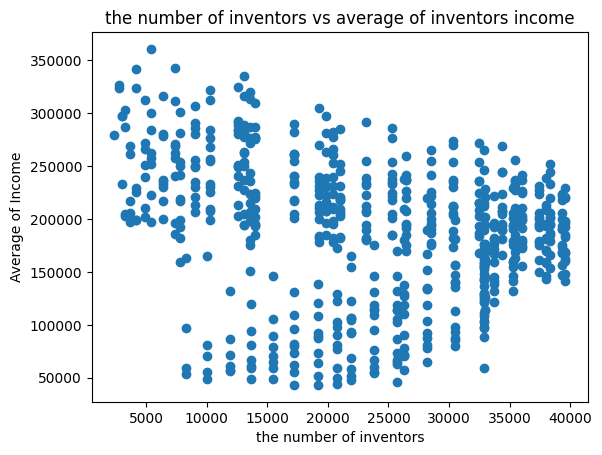

In [ ]:
plt.scatter(x=count_gen['count'],y=count_gen['total_inc_mean'])
plt.xlabel('the number of inventors')
plt.ylabel('Average of Income')
plt.title('the number of inventors vs average of inventors income')


Question 2: For this question we are looking at the difference between the number of inventors and patents between the Community College and non Community College Schools. To start the visualization off we look at three main variables: num_pq5, count, and total_patents. These variables will allow us to better understand how the number of inventors in each school system differs and how that impacts the number of patents coming from that schooling system as well. In order to compare apples to apples we create a num_pq5 variable which takes the proportions of investors in each school and multiplies them by the school’s count. This variable will allow us to better compare each school within a system, but also the two different school systems as well. 

Text(0, 0.5, 'number of Total Patents')

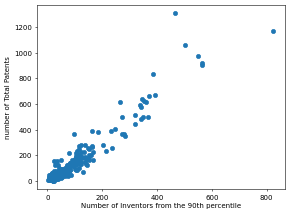

In [ ]:
#plotting the regression
fig, ax = plt.subplots(dpi = 100)
ax.scatter(not_cc["num_pq5"],not_cc["total_patents"])
plt.xlabel("Number of Inventors from the 90th percentile")
plt.ylabel("number of Total Patents")

The first scatter plot we compare for both schooling systems is a scatter plot between the number of inventors and the total number of patents coming from that school. This allows us to understand two things. Does having more inventors really correlate to having more patents? Secondly, how does this compare between the two schooling systems? When looking at the Community College scatter plot, we can see that there is a cluster of data where there are low numbers of inventors and this results in there being a low total number of patents, although there is not a lot of data showing that higher number of investors necessarily lead to there being a high number of patents. Although when looking into the non Community College scatter plot the story is completely different. Here we can see that there is a clear positive relationship between the number of inventors and and the total number of patents. Now when comparing the two scatter plot together, we can see that two schooling systems do not show the sam correlation between these two variables. Community Colleges don’t show a strong correlation while non Community Colleges do, this could be due to there only being a few points of data for Community Colleges while there being so much more data on non Community Colleges, but more on that in Part 8.


Text(0, 0.5, 'number of Total Patents')

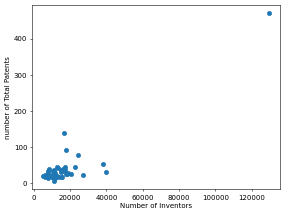

In [ ]:
fig, ax = plt.subplots(dpi = 100)

ax.scatter(cc["count"],cc["total_patents"])
plt.xlabel("Number of Inventors")
plt.ylabel("number of Total Patents")

Text(0, 0.5, 'Total Patents')

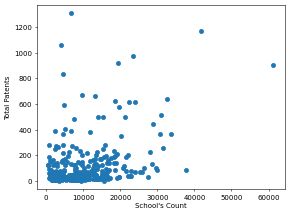

In [ ]:
fig, ax = plt.subplots(dpi = 100)

ax.scatter(not_cc["count"],not_cc["total_patents"])
plt.xlabel("School's Count")
plt.ylabel("Total Patents")

The scatter plot above is taking the concerns of the first question and exploring that. In this plot we are trying to understand if the size of the school matters in terms of the number of patents coming from that school. To answer this question we plot and compare the Count and Total patents variables. When looking at the results for the Community College scatterplot we see that there may potentially be a weak positive relationship between the two variables, where having a high school count leads to there being more patents. Although for non Community Colleges the story is quite the opposite. There is a large cluster of data in the bottom left hand corner, signifying that the lower the count of the school the less number of patents. Although there is a lot of variability in the data there are many schools on the extremes such as having a high count with lower patents, or low count with higher number of patents. Overall from these two scatter plots we can understand that there is not much of a correlation between the count of the school and the number of patents that schools produce. This partially answers our concerns from question 1, where there is not much of a relation between the size, but still does not address how more data on Community Colleges would impact the results.


### **Looking at the median size for each schooling system**

In [ ]:
cc["count"].median()

13331.0

In [ ]:
not_cc["count"].median()

7669.5

## Modeling (20 points)

## **Research Question 1:**

Linear regression of count vs total income and then breaking it down by the generations. Utilizing a linear regression to visualize the correlation between count and total income mean. Creating a scatterplot to get a visualization of the total income mean over count of inventors and categorizing it by the generation to observe the differences in generations as well. For the Linear Regression Model we simply applied a simple linear regression using Table 4a. Choosing a regression model with multiple variables allows us to see the effect of generation simultaneously and it is easier for us to compare their effects on average of total income. Besides, when we look at the scatter plot age vs. total_inc_mean, note that the age factor is an indicator of generation, we observe a certain linear relationship. Therefore, linear regression becomes a valid model for us. 

In [ ]:
X = count_gen[['Millennial','Baby Boomer','count']]
y = standardization(count_gen, 'total_inc_mean')

#Fit linear regression model

model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         total_inc_mean   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.432
Method:                 Least Squares   F-statistic:                              162.5
Date:                Tue, 02 May 2023   Prob (F-statistic):                    3.87e-78
Time:                        05:13:37   Log-Likelihood:                         -722.17
No. Observations:                 637   AIC:                                      1450.
Df Residuals:                     634   BIC:                                      1464.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
X = count_gen[['Millennial','Gen X','count']]
y = standardization(count_gen, 'total_inc_mean')

#Fit linear regression model

model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         total_inc_mean   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.331
Method:                 Least Squares   F-statistic:                              105.8
Date:                Tue, 02 May 2023   Prob (F-statistic):                    1.48e-55
Time:                        05:13:37   Log-Likelihood:                         -774.55
No. Observations:                 637   AIC:                                      1555.
Df Residuals:                     634   BIC:                                      1568.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Applying a Ridge and Lasso Regression onto the whole data. Ridge and Lasso Regression models were chosen as the second model for this question since we would like to prevent overfitting and improve the generalization performance of the model. By applying the regression, it will tell us whether our Linear Regression did not have problems with overfitting. In order to gain a better understanding of whether the results from the data was derived from bias or variance, applying the ridge lasso regression allows us to get a better visualization of this by creating a training and test set using our dataset. 



In [ ]:
def run_model(X_train, X_test, y_train, y_test, model):
    
    model = model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, pred)
    return train_mse, test_mse

models = {'Linear': LinearRegression(),
         'Ridge': Ridge(),
         'Lasso': Lasso()}

""" Given dict of models, fits and predicts on test and training data.
    Returns train and test MSE as a dict of models.
"""
def results(models):
    results = {}
    for model in models.keys():
   
        train_mse, test_mse = run_model(X_train, X_test, y_train, y_test, models[model])
        print(model)
        print('Train MSE: ',train_mse)
        print('Test MSE:', test_mse,'\n')
        results[model] = train_mse, test_mse
    return results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)
results(models)

Linear
Train MSE:  0.5968243233211934
Test MSE: 0.4230726732515421 

Ridge
Train MSE:  0.5972973991579058
Test MSE: 0.42237578989095814 

Lasso
Train MSE:  0.9757171199673612
Test MSE: 0.7824809148565345 



{'Linear': (0.5968243233211934, 0.4230726732515421),
 'Ridge': (0.5972973991579058, 0.42237578989095814),
 'Lasso': (0.9757171199673612, 0.7824809148565345)}

## **Research Question 2:**

In order to answer this question we decided on using a simple Linear Regression and a Decision Tree Classifier. These two models would help us easily compare and contrast various statistics, model results, and analysis between the two different schooling systems. Using Raj Chetty’s data from Table 3 we have decided to use the following features and variables: Count, inventor_pq5, total_patents. We decided to use the count variable as a means to compare and potentially provide solutions as to why there is or is not a difference between the two schooling systems regarding the number of patents they are producing. The inventor_pq5 variable is the proportion of inventors in a specific school. In our analysis we create a num_pq5 variable that is the product of the proportion of inventors and the student population variable. Creating this variable allows us to easily compare the number of inventors between different schools and school systems. The total number of patents variable is our prediction variable for all of the models surrounding this question as we are trying to figure out which other variables and factors greatly influence the productivity of a school, which is measured in the total number of patents produced by that school. 

We selected Decision Tree Classifier as the other model for this question to predict the share of inventors in each college, then classify the college as a low share of inventor, medium share of inventor, or high share of inventor based on the results from the decision tree. We decided to include the number of inventors in the top 20% quintile, and total_patents, total_cites because they are the variables that are correlated with the share of inventors. Since the other variables such as the number of inventors in the bottom 20% quintile are also related to the number of inventors in the top 20% quintile, we decided to not include those variables to avoid redundant information. Besides, we chose Decision Tree over Random Forest because Decision Tree Classifier tends to give us a more accurate result because it builds a deeper tree which relies on more information. We are aware that the Decision Tree has a higher variance compared to Random Forest. However, since the explanatory variables selected in this model are not too many, the advantage of using Random Forest, which selects the most relevant variables, is not very helpful. 

For the Linear Regression Model we simply divided the Table 3 data into two dataframes and applied a simple linear regression. As far as bias-variance tradeoff and other factors surround model choice, the simple linear regression provides a simple but effective way to compare different variable with the total number of patents produced, and any variability in the data would result in the linear regression model not being a good prediction model for the total number of patents. The simplicity and effectiveness of this model could not have been overlooked and is the reason this is one of our models for this question.


## Community college linear regression models

In [ ]:
#num_pq5 vs total patents
x = cc[["num_pq5"]]
y = cc[["total_patents"]]
x_count = cc[["count"]]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          total_patents   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 02 May 2023   Prob (F-statistic):           9.79e-18
Time:                        05:13:37   Log-Likelihood:                -204.76
No. Observations:                  43   AIC:                             413.5
Df Residuals:                      41   BIC:                             417.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2158      5.820     -2.271      0.0

In [ ]:
#count vs total patents
x_count = sm.add_constant(x_count)
model = sm.OLS(y,x_count).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          total_patents   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.29e-17
Time:                        05:13:37   Log-Likelihood:                -205.65
No. Observations:                  43   AIC:                             415.3
Df Residuals:                      41   BIC:                             418.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4493      6.151     -2.837      0.0

In [ ]:
# split data into test and train set for cc
train_cc, test_cc = np.split(shuffle(cc),[32])
X_traincc = train_cc.copy()
X_traincc = X_traincc.loc[:,['inventor_pq5','total_patents ratio','total_cites ratio']]
y_traincc = train_cc['bins']
X_testcc = test_cc.copy()
X_testcc = X_testcc.loc[:,['inventor_pq5','total_patents ratio','total_cites ratio']]
y_testcc = test_cc['bins']
## standardize data: different scales. good for linear regression, lasso, clustering

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state = 40)
model_tree.fit(X_traincc, y_traincc)

DecisionTreeClassifier(random_state=40)

In [ ]:
# performance of model
predictions_train = model_tree.predict(X_traincc)
predictions_test = model_tree.predict(X_testcc)
accuracy_tree = np.sum(predictions_test == y_testcc)/len(predictions_test)
accuracy_tree

0.9090909090909091

## Non Community College Linear Regression Models

In [ ]:
#num_pq5 vs total patents
X = not_cc[["num_pq5"]]
Y = not_cc[["total_patents"]]
X_count = not_cc[["count"]]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          total_patents   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     4231.
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.27e-207
Time:                        05:13:38   Log-Likelihood:                -2028.8
No. Observations:                 380   AIC:                             4062.
Df Residuals:                     378   BIC:                             4069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4937      3.169     -3.943      0.0

In [ ]:
#count vs total patents
X_count = sm.add_constant(X_count)
model = sm.OLS(Y,X_count).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          total_patents   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     75.16
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.29e-16
Time:                        05:13:38   Log-Likelihood:                -2469.5
No. Observations:                 380   AIC:                             4943.
Df Residuals:                     378   BIC:                             4951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9186     12.838      1.629      0.1

In [ ]:
# split data into test and train set for not_cc
# using data without outliers
from sklearn.utils import shuffle
train_noncc, test_noncc = np.split(shuffle(not_cc),[240])
X_train = train_noncc.copy()
X_train = X_train.loc[:,['inventor_pq5','total_patents','total_cites']]
y_train = train_noncc['bins']
X_test = test_noncc.copy()
X_test = X_test.loc[:,['inventor_pq5','total_patents','total_cites']]
y_test = test_noncc['bins']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state = 41)
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=41)

In [ ]:
# performance of the model
predictions_train = model_tree.predict(X_train)

In [ ]:
predictions_test = model_tree.predict(X_test)
accuracy_tree = np.sum(predictions_test == y_test)/len(predictions_test)
accuracy_tree

0.8214285714285714

Be aware that the prediction only works for colleges with more than 10 inventors. For college having less than 10 inventors, the model may not be applicable. 

## Interpretation and Conclusions (20 points)
Question 1: 
The coefficients of Millennial and Gen X are  negative. The interpretation of them is, holding the number of inventions are  the same, being  Millennial or Gen X has a lower average mean of income. One of the possible reasons can be the different exposure, including the factors of policy, invention opportunity, to innovation among generations. Even though many institutions encourage innovation, recent inventors do not receive rewards as much as other generations, such as Baby boomers. Note that the coefficient of Baby Boomer has a positive sign in our model. Since all coefficients for generations are statistically significant, we can conclude that the environmental factor – generation plays a significant role in the average income of inventors. 

No matter which generation that inventors belong to, they should have a fair opportunity to earn higher income. This is important because it relates to upward mobility in the inventor group. Decision makers should establish policies that ensure inventor remuneration rights. The possible area that lacks regulation can come from the compensation that is determined by the employer. We should investigate if corporations are being too flexible in terms of compensation to inventor employees. If more corporations value their inventor employees more, all coefficients of generation will be positive. In other words, we would expect to see identical effects on average of inventor income across generations. 

Caveat? We had to remove one outlier in the dataframe that had a total income mean  that was largely negative because it would skew our results. We understand this as important information because a negative total income can occur in the real world when in the innovation sector. We infer that this negative total income mean tells us that there is a great amount of debt in this group of the data and that can be absolutely normal because in order to innovate there is a great amount of risk that comes with it. Besides, when we were building the model with count, Millennial, baby Boomer and total_inc_p90 (the average income of the 90th percentile), we observed that the coefficients of generation have very high standard error. The coefficients were not stable. We solved this problem by removing the total_inc_p90 column because we believed there is a reverse causality which drives up the variance of our coefficients.

Our model is not perfect even though it has very low mean squared error in the training set and test set. However, when we look at the OLS regression results, the R^2 is only 0.435. Majority of the variance in the mean of total income is not captured in our final model. More explanatory variables should be considered if we want to  predict the total income mean more accurately. More information could be created or extracted from other datasets, rather than taking information from one table. In addition, since the data does not include immigrants in the U.S., we cannot use our models to generalize the result to the entire U.S. population.
Resource:https://lalaw.com/knowledge-center/article/thinking-globally-inventor-remuneration-rights

Question 2: This question’s main goal was to look at both schooling systems: Community College and non Community College, and understand if there is a significant difference in the number of inventors and patents coming out of these schools. One model used to answer this question was simple linear regression. This model would be able to predict, given someone attending one of these school systems, based on parameters such as their school’s size or number of inventors how many patents could potentially be produced. We’ll start off by looking at the linear regression model for Community Colleges first and see what the results are highlighting and how we can use them to take appropriate action. 

In the first Linear Regression Model we are looking at the relationship between the number of Inventors at a Community College and using that to predict how many patents a Community College may produce based on that variable. When looking at the OLS Regression results we see that we get the following equation for our Linear Regression: Y = 12.9147 + 0.6007X. This equation’s intercept is saying that with no inventors at a Community College, there will still be approximately 13 patents filed by that school. The slope of this regression means that each inventor at the school will produce 0.6 patents. To put this in more applicable terms this means that approximately for every 5 inventors there will be 3 patents filed by that school. Although when looking at other summary statistics such as the t-value for the coefficient we see that it is 4.029. This translates to our num_pq5 variable being a good predictor on how the total number of patents shifts when there is a change in the number of inventors at a school. Furthermore, the p-values for this model are less than 0.05 which means that the variable num_pq5 is again proven to be a strong indicator and predictor for the total number of patents. 

When we compare the similar regression done for non Community Colleges we see a similar strong regression model and results. The Linear Regression Equation for non Community Colleges is Y = -12.4937 + 1.6922X. This equation’s slope means that for every additional inventor at a non Community College there is an approximately 1.7 patent increase from that school. Although when looking at this model’s intercept we see that it is approximately -12.5, which means that a school with no inventors actually has a negative number of patents. Logically this makes no sense, but when we take into consideration the previous scatter plot regarding the size of non Community Colleges this result begins to make sense. Non Community College schools tend to have a larger student population and this negative coefficient is trying to show that in a school of such size there needs to be more student inventors in order to have a positive number of patents coming from that school. Again when looking at the t-value for the coefficient we see we have an extremely high 65. This means that the number of inventors at a specific school is an extremely good predictor for the total number of patents coming from that school. The p-value further supports this conclusion. Additionally when looking at the R-squared value we see a value of 0.918. This value means that 91.8% of fluctuations in the total number of patents can be explained by the number of inventors at that school. All these statistical measures point to the fact that the number of inventors does an incredible job at predicting the total number of patents produced by a school in either school system.

The other Linear Regression we look at is looking at the School’s population and how well that can predict the total number of patents produced. This additional question was to look further into how much the school’s size plays a role in the total number of patents, after we observed that Community College would have a significantly higher student population when compared to non Community Colleges. When looking at the regression for Community Colleges we get the following equation: Y = 17.0362 + 0.0010X. This equation’s slope says that with one additional student there is an increase in the total number of patents from that school by 0.001. To put this into perspective every 1000 additional students constitute an increase in the total number of patents by 1. Now when further looking into the summary statistics we see some disappointing results. The t-value for the coefficient is 2.086 which indicates that the Count variable is not a good predictor for the total number of patents coming from a school. Additionally with higher p-values and extremely low R-squared values we can conclude that there is not a strong relationship between the student population and the total number of patents at a school. Now these results and conclusions go for both Community Colleges and non Community Colleges, as we see similar summary statistics.

Now that we understand the summary statistics for each model we can begin to formulate conclusions about these results. When looking at the first model regarding the number of inventors and the total number of patents produced from a specific school, a general conclusion is that the more inventors a school has the more patents a school will produce. This means that equipping students with the right skill set in engineering, mathematics, and other disciplines aligned with becoming an inventor should be promoted in order to help increase the total number of patents from that school. When diving deeper into each specific schooling system we have different conclusions. When looking at the coefficient of Community Colleges vs non Community Colleges we see that the coefficient is lower for Community Colleges. This means that with more inventors there is a smaller impact on the total number of patents compared to that of non Community Colleges. Now this can be for several reasons such as the resources that a 4-year provides are generally better than a Community College as funding from tuition and other sources is much higher. IN order to tackle this problem we would want more resources and knowledge pushed in Community Colleges in order to increase the number of inventors and increase the number of total patents. Although if we want to increase the coefficient, then we would want to promote better resources and a greater incentive for students to become inventors and invent more. This would help increase the total number of patents per person and increase the coefficient By increasing the coefficient we are simply increasing the number of patents a single person is producing in their lifetime. 

The Linear Regression model between the number of inventors and the total number of patents is a phenomenal model, and can be used to predict the total number of patents for a school in either schooling system accurately. Although there is one flaw in this model and has to do with the raw data. In Raj Chetty’s Table 3 we are working with simply 43 Community Colleges. Now compared to the 300+ non Community Colleges, this number is miniscule. There is a possibility that these 43 Community Colleges are not grasping the full picture and story of the Community College inventors. For this reason in future revision, obtaining more data on Community Colleges would allow us to create a more sound and potentially less biased model. Besides this fact, there are not many other major flaws in the Linear Regression Model for these two variables.
